In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cr=pd.read_csv('cp.csv')
cr.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
cr.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
cr['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## N-ratio of nirtrogen content in soil
## p ratio of phosphorous content in soil
## k- ratio of potassium content in soil
## temperature in degree celsius
## humidity- relative humidity in %
## ph: ph value in soil
## rainfall in mm

In [5]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
cr.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
pd.pivot_table(cr,index='label',values=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [8]:
X=cr.drop(['label'],axis=1)
y=cr['label']

<Axes: >

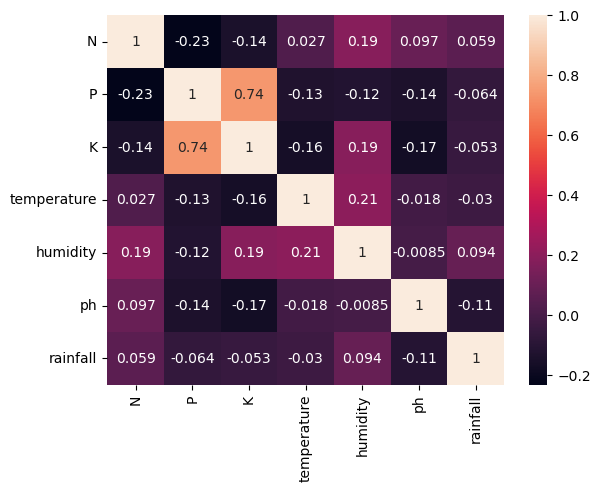

In [9]:
sns.heatmap(X.corr(),annot=True)

In [10]:
acc=[]
model=[]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
import warnings 
warnings.filterwarnings('ignore')

In [16]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [17]:
y_pred=log_reg.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print("accuracy_score",accuracy_score(Y_test,y_pred)*100)

accuracy_score 94.54545454545455


In [20]:
from sklearn.svm import SVC

In [21]:
svc_clf=SVC()
svc_clf.fit(X_train,Y_train)

SVC()

In [22]:
y_pred=svc_clf.predict(X_test)

In [23]:
print("accuracy_score",accuracy_score(Y_test,y_pred)*100)

accuracy_score 96.13636363636363


In [24]:
import scikitplot as skplt

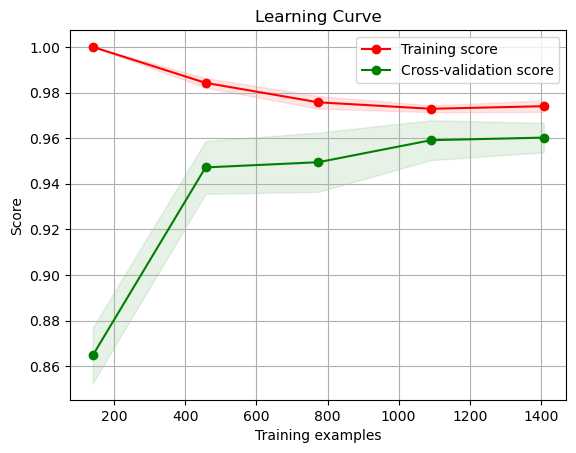

In [25]:
skplt.estimators.plot_learning_curve(log_reg,X_train,Y_train)
plt.show()

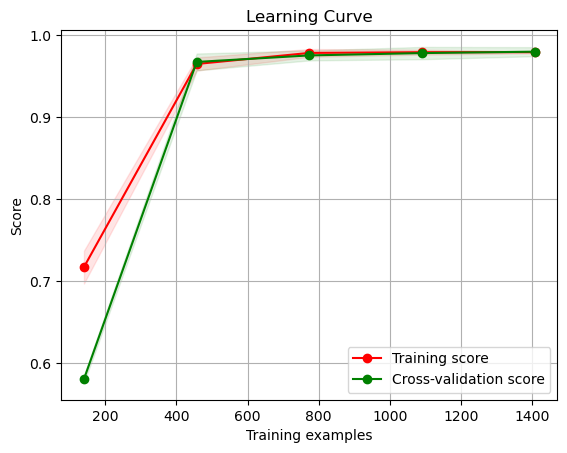

In [26]:
skplt.estimators.plot_learning_curve(svc_clf,X_train,Y_train)
plt.show()

In [27]:
#log_loss
from sklearn.metrics import roc_auc_score
y_pred1_proba=log_reg.predict_proba(X_test)

In [28]:
class_1_prob=list()
for i in y_pred1_proba:
    class_1_prob.append(i)
print(roc_auc_score(Y_test,class_1_prob,multi_class='ovo')*100)

99.86984868689723


In [29]:
import pickle

In [30]:
with open('crop_model','wb')as f:
    pickle.dump(svc_clf,f)

In [31]:
# N=int(input("Enter nitrogen: "))
# p=int(input("Enter phosphorous: "))
# k=int(input("Enter potassium: "))
# temp=float(input("Enter temperature: "))
# humidity=float(input("Enter humidity: "))
# ph=float(input("Enter ph: "))
# rainfall=float(input("Enter rainfall: "))
# userInput=[N,p,k,temp,humidity,ph,rainfall]

Enter nitrogen: 23
Enter phosphorous: 44
Enter potassium: 56
Enter temperature: 53
Enter humidity: 12
Enter ph: 3
Enter rainfall: 233


In [32]:
with open('crop_model','rb') as f:
    np=pickle.load(f)